#Background:

We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

# Data Description:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

# Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

#Output (desired target):

y - has the client subscribed to a term deposit? (binary)


In [ ]:
#importing libraries
!pip install scikit-learn==1.2.2
!pip install xgboost
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Getting the unique types of categorical data

In [ ]:
# Load the dataset from the file
file_path = '/content/term-deposit-marketing-2020.csv'
dt = pd.read_csv(file_path)



# Get all unique job types from the 'job' column
jobs = dt['job'].unique()
marital=dt['marital'].unique()
education=dt['education'].unique()
concat=dt['contact'].unique()
months=dt['month'].unique()
defaul=dt['default'].unique()
housing=dt['housing'].unique()
loan=dt['loan'].unique()
y=dt['y'].unique()
# Display the unique types
print(jobs)
print(marital)
print(education)
print(concat)
print(months)
print(defaul)
print(housing)
print(loan)
print(y)

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['no' 'yes']


In [ ]:
dt.head()
dt.info()
dt.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


(40000, 14)

# Making a map
supposed to make differnt dictionaries to replace the categorical data with numbers to make all of the data as numeric and actually with the same type to make it easier for recognizing for models and not erupted



In [ ]:
# Manually defined mapping
dt['job'] = dt['job'].str.lower().str.strip()
job_mapping = {
    'management': 10,
    'technician': 1,
    'entrepreneur': 2,
    'blue-collar': 3,
    'unknown': 0,
    'retired': 4,
    'admin': 5,
    'services': 6,
    'self-employed': 7,
    'unemployed': 8,
    'housemaid': 9,
    'student': 11
}
dt['marital'] = dt['marital'].str.lower().str.strip()
marital_mapping = {'married' : 1 , 'single': 0 , 'divorced':2}
dt['education'] = dt['education'].str.lower().str.strip()
education_mapping = {'tertiary' :3 ,'secondary' :2 ,'unknown':0 , 'primary':1}
dt['contact'] = dt['contact'].str.lower().str.strip()
concat_mapping = {'cellular':1 , 'telephone':2 , 'unknown':0}
dt['month'] = dt['month'].str.lower().str.strip()
months_mapping = {'may':5 , 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11 ,'dec':12 ,'jan':1, 'feb':2, 'mar':3, 'apr':4}
dt['default'] = dt['default'].str.lower().str.strip()
dt['housing'] = dt['housing'].str.lower().str.strip()
dt['loan'] = dt['loan'].str.lower().str.strip()
dt['y'] = dt['y'].str.lower().str.strip()
defaul_mapping = {'yes':1, 'no':0}
housing_mapping = {'yes':1, 'no':0}
loan_mapping = {'yes':1, 'no':0}
y_mapping = {'yes':1, 'no':0}

# Replace the 'job' column using the mapping
dt['job'] = dt['job'].map(job_mapping)
dt['marital'] = dt['marital'].map(marital_mapping)
dt['education'] = dt['education'].map(education_mapping)
dt['contact'] = dt['contact'].map(concat_mapping)
dt['month'] = dt['month'].map(months_mapping)
dt['default'] = dt['default'].map(defaul_mapping)
dt['housing'] = dt['housing'].map(housing_mapping)
dt['loan'] = dt['loan'].map(loan_mapping)
dt['y'] = dt['y'].map(y_mapping)

# Display the first few rows to confirm the change
print("Modified data:")
print(dt.head())

Modified data:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58   10        1          3        0     2143        1     0        0   
1   44    1        0          2        0       29        1     0        0   
2   33    2        1          2        0        2        1     1        0   
3   47    3        1          0        0     1506        1     0        0   
4   33    0        0          0        0        1        0     0        0   

   day  month  duration  campaign  y  
0    5      5       261         1  0  
1    5      5       151         1  0  
2    5      5        76         1  0  
3    5      5        92         1  0  
4    5      5       198         1  0  


In [ ]:

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        40000 non-null  int64
 1   job        40000 non-null  int64
 2   marital    40000 non-null  int64
 3   education  40000 non-null  int64
 4   default    40000 non-null  int64
 5   balance    40000 non-null  int64
 6   housing    40000 non-null  int64
 7   loan       40000 non-null  int64
 8   contact    40000 non-null  int64
 9   day        40000 non-null  int64
 10  month      40000 non-null  int64
 11  duration   40000 non-null  int64
 12  campaign   40000 non-null  int64
 13  y          40000 non-null  int64
dtypes: int64(14)
memory usage: 4.3 MB


In [ ]:
dt.shape

(40000, 14)

# defining the features and target

In [ ]:
x = dt[['age','job', 'marital' , 'education' , 'default',  'balance' , 'housing' , 'loan' , 'contact' , 'day' , 'month' , 'duration' , 'campaign' ]]
display(x.head())
print(x.shape)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,10,1,3,0,2143,1,0,0,5,5,261,1
1,44,1,0,2,0,29,1,0,0,5,5,151,1
2,33,2,1,2,0,2,1,1,0,5,5,76,1
3,47,3,1,0,0,1506,1,0,0,5,5,92,1
4,33,0,0,0,0,1,0,0,0,5,5,198,1


(40000, 13)


In [ ]:
y = dt[['y']]
display(y.head())
print(y.shape)

,y
0,0
1,0
2,0
3,0
4,0


(40000, 1)


# spliting the data

In [ ]:
# split in training 80%, test 20% test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
# Reshape y_train to be a one-dimensional array
y_train = y_train['y'].values.ravel()
y_test = y_test['y'].values.ravel()

In [ ]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (32000, 13)
x_test (8000, 13)
y_train (32000,)
y_test (8000,)


# creating several models
creating a 5-fold cross-validation models by providing the entire dataset for the GridSearchCV and it will handle the splitting using the cv=5 parameter, which internally applies a 5-fold cross-validation across the entire dataset.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
# Initialize a StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# List to store the accuracy for each fold
accuracies = []
scaler = StandardScaler()
# Initialize the LinearSVC model
svm_model = LinearSVC(dual=False, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
}

# Setup the grid search
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

# Fit the grid search to the scaled training data
grid_search_svm.fit(x_train_scaled, y_train)

# Get the best parameters and best score
print("Best parameters:", grid_search_svm.best_params_)
print("Best score:", grid_search_svm.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'C': 0.1}
Best score: 0.930625


In [ ]:
## Train Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV
rf_model = RandomForestClassifier()
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],  # Reduced number of options
    'max_depth': [None, 20],  # Simplified choices
    'min_samples_split': [2, 10],  # Fewer options
    'min_samples_leaf': [1, 4]  # Fewer options
}

# Setup and run randomized search
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
).fit(x_train, y_train)

# Output results
print("Best Parameters:", random_search_rf.best_params_)
print("Best Score:", random_search_rf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Best Score: 0.9360937500000001


In [ ]:
# creating the Decision Tree Classifier

# Define the hyperparameters grid
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Initialize the GridSearchCV with the Decision Tree and the hyperparameter grid
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search model to the training data
grid_search_dt.fit(x_train, y_train)

# Best hyperparameters
best_params = grid_search_dt.best_params_
best_score = grid_search_dt.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.932625


In [ ]:
# creating a xgboost with hyperparametric tuning
model = xgb.XGBClassifier()

# Define the parameters grid
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [ 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Setup the grid search
grid_search_xg = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

# Perform grid search
grid_search_xg.fit(x_train, y_train)
# Best hyperparameters
best_params = grid_search_xg.best_params_
best_score = grid_search_xg.best_score_
# Best model parameters and results
print("Best parameters:", grid_search_xg.best_params_)
print("Best score:", grid_search_xg.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score: 0.9374062500000001


In [ ]:
# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('rf', rf_model), ('svm',svm_model) ,('xgb',model)],
    voting='hard'  # Use 'soft' if you want to weigh probabilities for voting
)

# Fit the voting classifier on the training data
voting_clf.fit(x_train, y_train)

# Predict and evaluate the model
y_pred = voting_clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.936625


# get predictions & evaluation of our models

In [ ]:
# get predictions evaluation of our models

# Make predictions and evaluate of decision tree
dt_pred = grid_search_dt.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Test Accuracy of decision tree : {dt_accuracy}")

# Make predictions and evaluate of xgboost
xg_pred = grid_search_xg.predict(x_test)
xg_accuracy = accuracy_score(y_test, xg_pred)
print(f"Test Accuracy of xgboost: {xg_accuracy}")

# Make predictions and evaluate of random forest
rf_pred = random_search_rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Test Accuracy of random forest : {rf_accuracy}")

# Make predictions and evaluate of svm
svm_pred= grid_search_svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Test accuracy of svm:", svm_accuracy)

# Make predictions of voting classifier
y_pred = voting_clf.predict(x_test)
vc_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of voting classifier: {vc_accuracy:.2f}")

Test Accuracy of decision tree : 0.936
Test Accuracy of xgboost: 0.9405
Test Accuracy of random forest : 0.939
Test accuracy of svm: 0.07275


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


Test Accuracy of voting classifier: 0.94


# choosing the best model
it was XGboost as it hit 94% accurcy in a sample of tested data

In [ ]:
# Calculate the difference in accuracy between train and test sets in random forest model
# Make predictions and evaluate of xgboost
xg_pred = grid_search_xg.predict(x_test)
xg_accuracy = accuracy_score(y_test, xg_pred)

# Calculate training accuracy
train_accuracy = grid_search_xg.score(x_train, y_train)
accuracy_difference = abs(train_accuracy - xg_accuracy)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {xg_accuracy}")
print(f"Difference in Accuracy: {accuracy_difference}")

Training Accuracy: 0.9583125
Test Accuracy: 0.9405
Difference in Accuracy: 0.01781250000000001


# Predicting the number of customers will subscribe

In [ ]:

predictions = grid_search_xg.predict(x_test)

# Count the occurrences of each class
yes = np.sum(predictions == 1)
no = np.sum(predictions == 0)

print(f"Number customers will buy : {yes}")
print(f"Number customers will not buy: {no}")

Number customers will buy : 357
Number customers will not buy: 7643


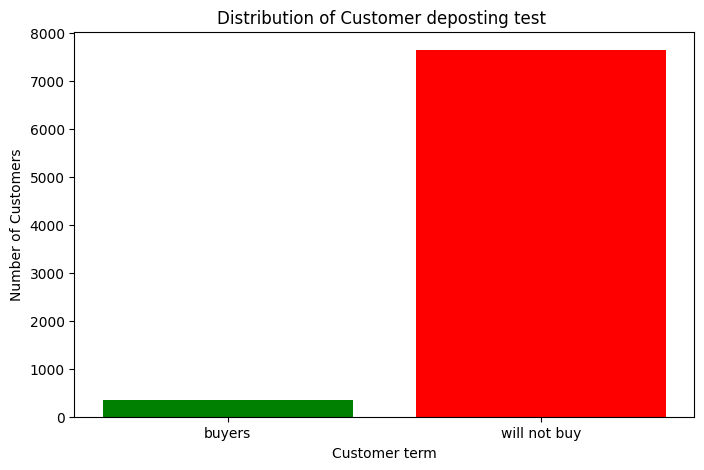

In [ ]:

predictions = grid_search_xg.predict(x_test)
# Count the occurrences of each class
yes = np.sum(predictions == 1)
no = np.sum(predictions == 0)
# Creating a bar chart to visualize the number of happy and unhappy customers
labels = ['buyers', 'will not buy']
counts = [yes, no]

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Customer term')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer deposting test ')
plt.show()

# the most imprtant features affect on the cutomers


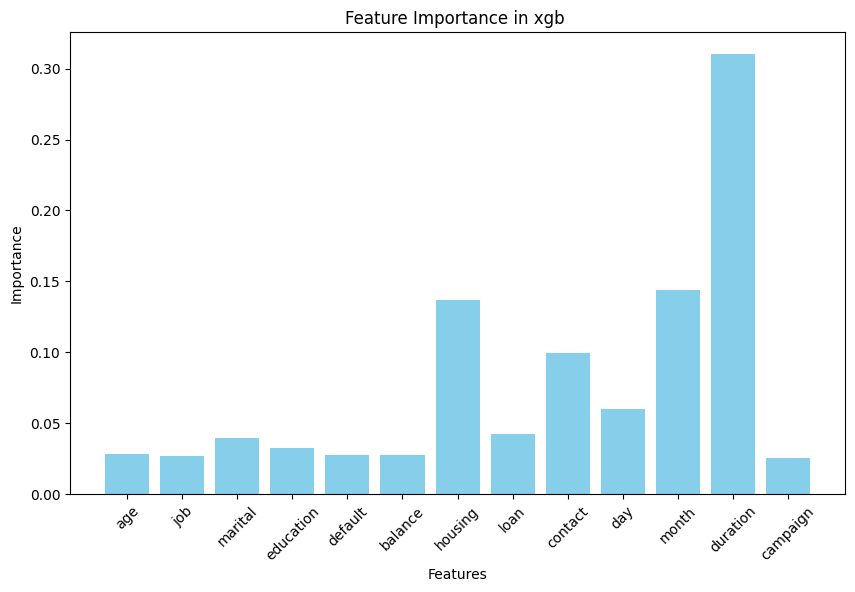

In [ ]:
# Get feature importances

best_params = grid_search_xg.best_params_

# Get feature importances from the best model
feature_importances =  grid_search_xg.best_estimator_.feature_importances_

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(x.columns, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in xgb ')
plt.xticks(rotation=45)
plt.show()